In [1]:
import pandas as pd
import ast
import warnings
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore', message='Specific warning message')

# Load the first dataset
df1 = pd.read_csv("IMDB_10000.csv")


# Load the second dataset
df2 = pd.read_csv("indian movies.csv")
#the main reason of merging the datasets is to analyse the best indian movies over a period of time ,
#the first data set contains 10,000 records and the second dataset contains 50,000 records.
# so i want to perform a inner join merge by the column  title which is common for the both datasets, and i want to exclude or 
#from the second data set we will only be needing one column except the common column because rest are the same even the values.
#so we are slicing the second dataset and also 1 st dataset to avoid some unnecessary info

In [2]:
df1.info()
#dataset one info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        10000 non-null  object 
 1   year         9736 non-null   object 
 2   certificate  6560 non-null   object 
 3   runtime      7938 non-null   object 
 4   genre        9867 non-null   object 
 5   desc         8959 non-null   object 
 6   rating       8959 non-null   float64
 7   votes        8959 non-null   object 
dtypes: float64(1), object(7)
memory usage: 625.1+ KB


In [3]:
df2.info()
#dataset 2 info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50602 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           50602 non-null  object
 1   title        50602 non-null  object
 2   Year         49041 non-null  object
 3   Timing(min)  50602 non-null  object
 4   Rating(10)   50602 non-null  object
 5   Votes        50602 non-null  object
 6   Genre        50602 non-null  object
 7   Language     50602 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [4]:
#here we have sliced the dataset 1 , because it contains a column called description , which we dont need.
df1=df1[['title','year','certificate','runtime','genre','rating','votes']]
df1

,title,year,certificate,runtime,genre,rating,votes
0,Freddy,2022,UA 16+,124 min,"Drama, Mystery, Thriller",7.9,"16,441"
1,An Action Hero,2022,U,130 min,Action,8.1,"15,690"
2,Kantara,2022,UA,148 min,"Action, Adventure, Drama",8.7,"78,358"
3,Khakee: The Bihar Chapter,2022–,UA 13+,45 min,"Action, Crime, Drama",8.3,"4,464"
4,Drishyam 2,2022,UA,140 min,"Crime, Drama, Mystery",8.6,"18,743"
...,...,...,...,...,...,...,...
9995,Kisan Aur Bhagwan,1974,NaN,142 min,"Action, Comedy, Drama",NaN,NaN
9996,Aadmi Sadak Ka,1977,NaN,138 min,"Drama, Family",NaN,NaN
9997,Nadodi Mannan,1958,NaN,220 min,"Action, Adventure, Comedy",NaN,NaN
9998,Njan Marykutty,2018,U,126 min,Drama,NaN,NaN


In [5]:
#as mentioned above we are creating a dataframe by slicing the second dataframe which we need for the merging so the combined
#dataset is getting all the values to analyze
df2=df2[['ID','Language', 'title']]
df2

,ID,Language,title
0,tt0398974,hindi,Dr. Shaitan
1,tt1702558,urdu,Nadir Khan
2,tt0493437,hindi,Apna Sapna Money Money
3,tt0273405,urdu,Aag Aur Sholay
4,tt0049595,hindi,Parivar
...,...,...,...
50597,tt2784720,hindi,Sulagte Armaan
50598,tt0315201,assamese,Aranya
50599,tt0270221,telugu,Balayogini
50600,tt0388697,telugu,Alajadi


In [6]:
merged_df = pd.merge(df2, df1, on='title',how='left')
merged_df
#here we have merged the datsets after slicing on the common column title, we used the inner join here.
#1938 to 2022

,ID,Language,title,year,certificate,runtime,genre,rating,votes
0,tt0398974,hindi,Dr. Shaitan,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1702558,urdu,Nadir Khan,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0493437,hindi,Apna Sapna Money Money,2006,U,134 min,"Comedy, Musical, Romance",7.4,"2,918"
3,tt0273405,urdu,Aag Aur Sholay,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0049595,hindi,Parivar,1956,U,NaN,"Comedy, Drama, Family",NaN,NaN
...,...,...,...,...,...,...,...,...,...
52553,tt2784720,hindi,Sulagte Armaan,NaN,NaN,NaN,NaN,NaN,NaN
52554,tt0315201,assamese,Aranya,NaN,NaN,NaN,NaN,NaN,NaN
52555,tt0270221,telugu,Balayogini,NaN,NaN,NaN,NaN,NaN,NaN
52556,tt0388697,telugu,Alajadi,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_dropna = merged_df.dropna()
df_dropna
#we have dropped the null value records, because there is no point in a keeping a record if some info is missing about the movie

,ID,Language,title,year,certificate,runtime,genre,rating,votes
2,tt0493437,hindi,Apna Sapna Money Money,2006,U,134 min,"Comedy, Musical, Romance",7.4,"2,918"
17,tt3148392,kannada,Shatru,2011,U,150 min,"Action, Crime, Drama",6.6,"1,815"
20,tt2302945,marathi,Tukaram,2012,U,156 min,"Biography, Drama, History",6.2,97
31,tt0065764,hindi,Geet,2010–2011,U,22 min,Romance,7.3,967
43,tt1582519,telugu,Khaleja,2010,UA,170 min,"Action, Comedy, Fantasy",5.9,"3,550"
...,...,...,...,...,...,...,...,...,...
52528,tt1179782,hindi,Mithya,2008,UA,110 min,"Comedy, Crime, Thriller",4.6,20
52536,tt14224118,urdu,Zanjeer,1973,U,145 min,"Action, Crime, Drama",7.1,"12,211"
52537,tt14224118,urdu,Zanjeer,2013,UA,137 min,"Action, Crime, Drama",6.0,"7,846"
52547,tt6836936,telugu,Saaho,2019,UA,170 min,"Action, Thriller",7.9,"57,348"


In [8]:
#in the above merged data frame we can see that the year contains a combination of some roman numbers and year numbers
#so we have used the extract method , which can extract a value that has continuously 4 values.
#used the extract because there was a space between the roman number and the year
df_dropna['year'] = df_dropna['year'].str.extract('(\d{4})')
df_dropna
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6920 entries, 2 to 52552
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           6920 non-null   object 
 1   Language     6920 non-null   object 
 2   title        6920 non-null   object 
 3   year         6919 non-null   object 
 4   certificate  6920 non-null   object 
 5   runtime      6920 non-null   object 
 6   genre        6920 non-null   object 
 7   rating       6920 non-null   float64
 8   votes        6920 non-null   object 
dtypes: float64(1), object(8)
memory usage: 540.6+ KB


C:\Users\Sai Vikram Alladi\AppData\Local\Temp\ipykernel_2200\2646320932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['year'] = df_dropna['year'].str.extract('(\d{4})')


In [9]:
#even though we have dropped the null value records, we can see many records with same movie title, it is because 
#many indian movies were present in the df which were present in different languages, as the language was only the change 
#between the records which had common title 
# we have used the group by and aggregation and then made the language to be a list and also other columns to pick the value of first record.

df_dropna= df_dropna.groupby('title',).agg({'year':'first','Language': list,'votes': 'first','rating':'first','genre':'first','runtime':'first','certificate':'first','ID':'first'}).reset_index()
df_dropna

,title,year,Language,votes,rating,genre,runtime,certificate,ID
0,'D',2005,[hindi],241,6.7,"Crime, Drama, Thriller",107 min,A,tt0454435
1,...Aur Pyaar Ho Gaya,1997,[hindi],331,7.0,"Comedy, Drama, Musical",147 min,U,tt0118525
2,...Yahaan,2005,[hindi],962,7.8,"Drama, Romance, War",142 min,UA,tt0473567
3,1 - Nenokkadine,2014,[telugu],"6,133",6.1,"Action, Thriller",170 min,UA,tt2375559
4,10 Endrathukulla,2015,[tamil],257,5.4,"Action, Adventure, Thriller",144 min,U,tt5128266
...,...,...,...,...,...,...,...,...,...
3899,Zubaan,2015,"[hindi, punjabi]",287,7.5,Drama,115 min,UA,tt3776484
3900,Zubeidaa,2001,"[hindi, rajastani, urdu]",143,5.4,"Biography, Drama, History",153 min,UA,tt0255713
3901,Zulfiqar,2016,[bengali],37,7.3,"Crime, Drama, Thriller",139 min,A,tt5232308
3902,Zulmi,1999,[hindi],552,7.2,"Action, Drama",129 min,A,tt0282275


In [10]:
#converting the data type to list 
df_dropna['Language'] = df_dropna['Language'].apply(lambda x: list(set(ast.literal_eval(x)) if isinstance(x, str) else x))

In [11]:
#to check if the langauge column values are converted into list of not
x=df_dropna.iloc[5]['Language']
x
type(x)

list

In [12]:
#here we are ommititng the null value records of the final df
final_df=df_dropna.dropna()
final_df

,title,year,Language,votes,rating,genre,runtime,certificate,ID
0,'D',2005,[hindi],241,6.7,"Crime, Drama, Thriller",107 min,A,tt0454435
1,...Aur Pyaar Ho Gaya,1997,[hindi],331,7.0,"Comedy, Drama, Musical",147 min,U,tt0118525
2,...Yahaan,2005,[hindi],962,7.8,"Drama, Romance, War",142 min,UA,tt0473567
3,1 - Nenokkadine,2014,[telugu],"6,133",6.1,"Action, Thriller",170 min,UA,tt2375559
4,10 Endrathukulla,2015,[tamil],257,5.4,"Action, Adventure, Thriller",144 min,U,tt5128266
...,...,...,...,...,...,...,...,...,...
3899,Zubaan,2015,"[hindi, punjabi]",287,7.5,Drama,115 min,UA,tt3776484
3900,Zubeidaa,2001,"[hindi, rajastani, urdu]",143,5.4,"Biography, Drama, History",153 min,UA,tt0255713
3901,Zulfiqar,2016,[bengali],37,7.3,"Crime, Drama, Thriller",139 min,A,tt5232308
3902,Zulmi,1999,[hindi],552,7.2,"Action, Drama",129 min,A,tt0282275


In [13]:
final_df.info()
#now here we need to use the as type to convert the object data type to numeric if they are numeric which can be used for analysis.
#for that we need to use tha astype method .

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3903 entries, 0 to 3903
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        3903 non-null   object 
 1   year         3903 non-null   object 
 2   Language     3903 non-null   object 
 3   votes        3903 non-null   object 
 4   rating       3903 non-null   float64
 5   genre        3903 non-null   object 
 6   runtime      3903 non-null   object 
 7   certificate  3903 non-null   object 
 8   ID           3903 non-null   object 
dtypes: float64(1), object(8)
memory usage: 304.9+ KB


In [14]:
#using the astype converting the data type of year to int
final_df['year'] = final_df['year'].astype(int)
#final_df.info() 

#eliminated the "," with blank and converted the votes into int/numeric
final_df['votes'] = pd.to_numeric(final_df['votes'].str.replace(',', ''))

#there was a string "min" in the runtime coliumn , we have replaced it with the blank space and converted the datatype of the
#column into the numeric/int
final_df['runtime'] = pd.to_numeric(final_df['runtime'].str.replace(' min', ''))


C:\Users\Sai Vikram Alladi\AppData\Local\Temp\ipykernel_2200\3214674593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['year'] = final_df['year'].astype(int)
C:\Users\Sai Vikram Alladi\AppData\Local\Temp\ipykernel_2200\3214674593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['votes'] = pd.to_numeric(final_df['votes'].str.replace(',', ''))
C:\Users\Sai Vikram Alladi\AppData\Local\Temp\ipykernel_2200\3214674593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [15]:
#infot abou the dataframe merged to verfiy if the convertions are made correctly or not
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3903 entries, 0 to 3903
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        3903 non-null   object 
 1   year         3903 non-null   int32  
 2   Language     3903 non-null   object 
 3   votes        3903 non-null   int64  
 4   rating       3903 non-null   float64
 5   genre        3903 non-null   object 
 6   runtime      3903 non-null   int64  
 7   certificate  3903 non-null   object 
 8   ID           3903 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 289.7+ KB


In [16]:
print(final_df.dtypes)

title           object
year             int32
Language        object
votes            int64
rating         float64
genre           object
runtime          int64
certificate     object
ID              object
dtype: object


In [17]:
#dataset3 for knowing the cast
df3= pd.read_csv("exp.csv", encoding='latin-1')
df3

,title,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#slicing the required columns of the dataframe 3, that are needed to merge to the dataset
df3=df3[['title','Director','Actor 1','Actor 2','Actor 3']]

In [19]:
#merging the thrid data set with the above merged data set 
final_merged= pd.merge(final_df, df3, on='title')

In [20]:
final_merged


,title,year,Language,votes,rating,genre,runtime,certificate,ID,Director,Actor 1,Actor 2,Actor 3
0,...Aur Pyaar Ho Gaya,1997,[hindi],331,7.0,"Comedy, Drama, Musical",147,U,tt0118525,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
1,...Yahaan,2005,[hindi],962,7.8,"Drama, Romance, War",142,UA,tt0473567,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
2,100 Days,1991,[hindi],1465,5.1,"Horror, Romance, Thriller",161,A,tt0101244,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
3,100% Love,2011,"[telugu, bengali]",213,6.8,"Comedy, Drama, Romance",141,U,tt1869226,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh
4,102 Not Out,2018,[hindi],3931,6.9,"Comedy, Drama",102,U,tt6580564,Umesh Shukla,Amitabh Bachchan,Rishi Kapoor,Vijay Raaz
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,Zindagi Na Milegi Dobara,2011,[hindi],50609,7.4,"Comedy, Drama, Musical",155,U,tt1562872,Zoya Akhtar,Hrithik Roshan,Farhan Akhtar,Abhay Deol
2547,Zokkomon,2011,[hindi],27,4.8,"Action, Adventure, Family",109,PG,tt1605790,Satyajit Bhatkal,Darsheel Safary,Anupam Kher,Manjari Fadnnis
2548,Zubaan,2015,"[hindi, punjabi]",287,7.5,Drama,115,UA,tt3776484,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
2549,Zubeidaa,2001,"[hindi, rajastani, urdu]",143,5.4,"Biography, Drama, History",153,UA,tt0255713,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee


In [21]:
#dropping the rows that have same title 
#becuase there were some same rows with different actors
final_merged = final_merged.drop_duplicates(subset=['title'])

In [22]:
final_merged['Language'] = final_merged['Language'].apply(lambda x: list(set(x)))
#list to set
#to eliminate the dupliacates in the list 
#final_merged.to_excel('fileout.xlsx')

C:\Users\Sai Vikram Alladi\AppData\Local\Temp\ipykernel_2200\3728491844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged['Language'] = final_merged['Language'].apply(lambda x: list(set(x)))


In [23]:
#creating a new column by counting the langauges 
final_merged['language_count']=final_merged['Language'].apply(len)
#creating a new column to find the length of the langauge column values,that is to check the language count of each movie

C:\Users\Sai Vikram Alladi\AppData\Local\Temp\ipykernel_2200\3972797913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged['language_count']=final_merged['Language'].apply(len)


In [24]:
#drop_duplicates-deletes if the row is not unique
#dropna-deltes the rows that contain empty values
final_merged=final_merged.dropna()

In [30]:
final_merged.to_excel('fileout.xlsx')

In [26]:
#wanted to create a wordcloud , so made sure that the actors name are strings
final_merged['Actor 1'] = final_merged['Actor 1'].astype(str)
final_merged['Actor 2'] = final_merged['Actor 2'].astype(str)
final_merged['Actor 3'] = final_merged['Actor 3'].astype(str)

In [27]:
#info about the final unique data set
final_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2550
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1967 non-null   object 
 1   year            1967 non-null   int32  
 2   Language        1967 non-null   object 
 3   votes           1967 non-null   int64  
 4   rating          1967 non-null   float64
 5   genre           1967 non-null   object 
 6   runtime         1967 non-null   int64  
 7   certificate     1967 non-null   object 
 8   ID              1967 non-null   object 
 9   Director        1967 non-null   object 
 10  Actor 1         1967 non-null   object 
 11  Actor 2         1967 non-null   object 
 12  Actor 3         1967 non-null   object 
 13  language_count  1967 non-null   int64  
dtypes: float64(1), int32(1), int64(3), object(9)
memory usage: 222.8+ KB


In [28]:
#creating a string by joining the names of the actors so that it will be input for the word cloud
text = ' '.join(final_merged['Actor 1']) + ' '.join(final_merged['Actor 2'])+' '.join(final_merged['Actor 3'])

In [29]:
#string made of the actor names
text

"Bobby Deol Jimmy Sheirgill Jackie Shroff Jeet Amitabh Bachchan Guru Dutt Mast Ali Madhavan Vikrant Massey Rajniesh Duggall Sharman Joshi Zareen Khan Anil Kapoor Manoj Bajpayee Arjun Kapoor Naseeruddin Shah Aamir Khan Aisha Ahmed Mastan Alibhai Burmawalla Rajvvir Aroraa Prashantt Guptha Priyanka Chopra Jonas Mohan Agashe Avinash Dhyani Rakshit Shetty Akshay Kumar Raj Nidimoru Ehan Bhat Tiger Shroff Raj Nidimoru Johnny Baweja Bobby Deol Anupam Kher Shravani Abhang Prabhu Deva Anil Kapoor Rajesh Khanna Abhijeet Lahiri Shashi Kapoor Govinda Vineet Kumar Singh Dilip Kumar Amit Sial Nargis Sunil Shetty Nargis Jackie Shroff Amitabh Bachchan Chiranjeevi Raj Babbar Madhuri Dixit Amitabh Bachchan Naseeruddin Shah Kamal Haasan Ajith Kumar A.S. Ravindra Babu Shashi Kapoor Rajesh Khanna Akshay Kumar Rajesh Khanna Suchitra Sen Govinda Joy Mukherjee Vinod Khanna Jackie Shroff Amitabh Bachchan Bhavana Madhuri Dixit Raj Kapoor Emraan Hashmi Rahul Roy Aditya Roy Kapoor Rekha Joseph Vijay Sanjay Dutt Ka

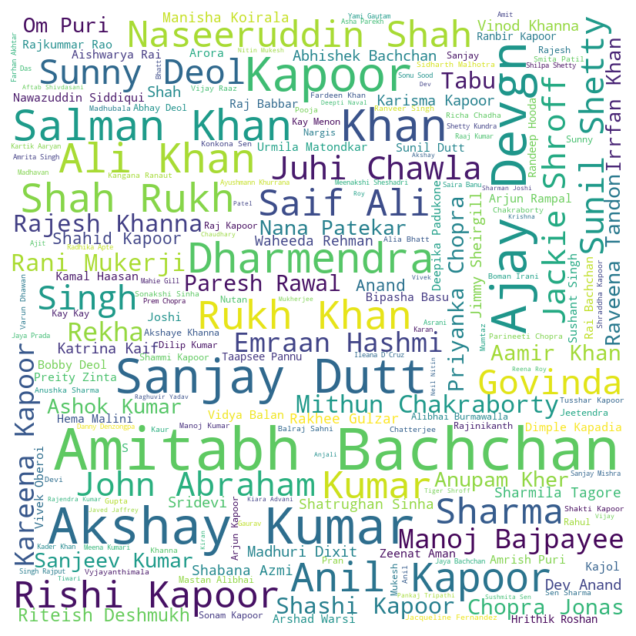

In [30]:
#wordcloud to depit the famous actors of the indian movies
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
#since the genre is combination of many words,sometimes,"comedy,thriller" and some times "action,comedy"
#i firstly want to split the words by separating them by ","
#then do the word cloud

x=final_merged.iloc[6]['genre']
x
type(x)

str

In [32]:
#extracting the director names into a list from the director feature of the dataframe
dir_list = []
for row in final_merged['Director']:
    dirs = row.split(',')
    for dir in dirs:
        dir_list.append(dir.strip())


In [33]:
dir_list

['Rahul Rawail',
 'Shoojit Sircar',
 'Partho Ghosh',
 'Rabi Kinagi',
 'Umesh Shukla',
 'Pramod Chakravorty',
 'Seshu Kmr',
 'Vikram K. Kumar',
 'Devanshu Singh',
 'Vikram Bhatt',
 'Dharmendra Suresh Desai',
 'Vikram Bhatt',
 'Vidhu Vinod Chopra',
 'Amrit Sagar',
 'Abhishek Varman',
 'Nagesh Kukunoor',
 'Rajkumar Hirani',
 'Arjun Mukerjee',
 'Abbas Alibhai Burmawalla',
 'Prawaal Raman',
 'Bharat Jain',
 'Vishal Bhardwaj',
 'Shravankumar Tiwari',
 'Avinash Dhyani',
 'Kiranraj K',
 'Nagesh Kukunoor',
 'Krishna D.K.',
 'Vishwesh Krishnamoorthy',
 "Remo D'Souza",
 'Krishna D.K.',
 'Ishaan Trivedi',
 'Suneel Darshan',
 'Neeraj Pandey',
 'Ramkumar Shedge',
 "Remo D'Souza",
 'Vikramaditya Motwane',
 'Rishi Kapoor',
 'Rajesh Harivansh Mishra',
 'Manmohan Desai',
 'Dipankar Senapati',
 'Suman Ghosh',
 'A. Bhimsingh',
 'Indrajit Nattoji',
 'Raj Kapoor',
 'Yogesh Ishwar',
 'Raja Nawathe',
 'Deepak Sareen',
 'K.C. Bokadia',
 'Ravi Raja Pinisetty',
 'Ravi Chopra',
 'Anil Mehta',
 'Bhagyaraj',
 'Govi

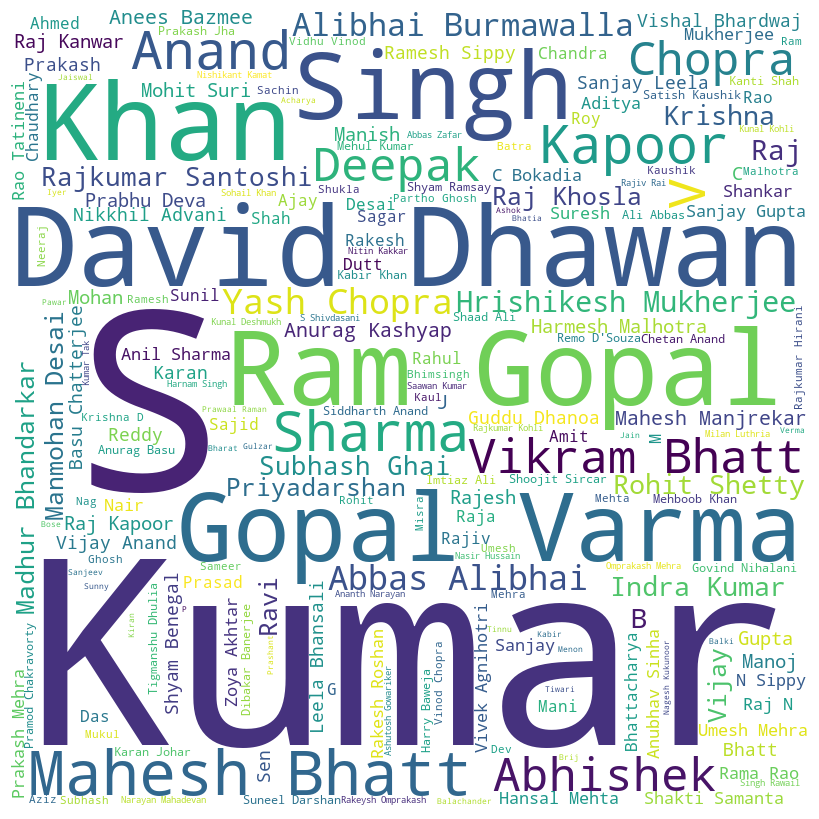

In [34]:
# create a word cloud from the list of directors by using the above created list 
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=5).generate(' '.join(dir_list))

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [35]:
# split the values in the 'genre' column by commas and create a list
genres_list = []
for row in final_merged['genre']:
    genres = row.split(',')
    for genre in genres:
        genres_list.append(genre.strip())



In [36]:
genres_list
#type(genres_list)



['Comedy',
 'Drama',
 'Musical',
 'Drama',
 'Romance',
 'War',
 'Horror',
 'Romance',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Horror',
 'Drama',
 'Horror',
 'Mystery',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'Romance',
 'Horror',
 'Mystery',
 'Horror',
 'Mystery',
 'Romance',
 'Action',
 'Drama',
 'History',
 'Action',
 'Drama',
 'War',
 'Comedy',
 'Drama',
 'Romance',
 'Crime',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Comedy',
 'Mystery',
 'Thriller',
 'Drama',
 'Mystery',
 'Thriller',
 'Horror',
 'Thriller',
 'Comedy',
 'Drama',
 'Mystery',
 'Thriller',
 'Action',
 'Biography',
 'Drama',
 'Adventure',
 'Comedy',
 'Drama',
 'Action',
 'Crime',
 'Drama',
 'Comedy',
 'Crime',
 'Drama',
 'Musical',
 'Romance',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Thriller',
 'Drama',
 'Romance',
 'Action',
 'Crime',
 'Drama',
 'Drama',
 'Drama',
 'Music',
 'Action',
 'Comedy',
 'Crime',
 'Musical',
 'Romance',

In [37]:
my_string = ' '.join([s.strip() for s in genres_list])
print(my_string)

Comedy Drama Musical Drama Romance War Horror Romance Thriller Comedy Drama Romance Comedy Drama Horror Thriller Comedy Horror Drama Horror Mystery Comedy Romance Horror Mystery Romance Horror Mystery Horror Mystery Romance Action Drama History Action Drama War Comedy Drama Romance Crime Drama Comedy Drama Drama Comedy Mystery Thriller Drama Mystery Thriller Horror Thriller Comedy Drama Mystery Thriller Action Biography Drama Adventure Comedy Drama Action Crime Drama Comedy Crime Drama Musical Romance Action Adventure Comedy Action Comedy Thriller Drama Romance Action Crime Drama Drama Drama Music Action Comedy Crime Musical Romance Drama Family Romance Action Drama Romance Action Drama Action Crime Drama Comedy Drama Thriller Action Comedy Drama Action Crime Drama Drama Musical Romance Drama Romance Action Crime Drama Action Thriller Action Drama Crime Drama Family Music Action Crime Drama Action Crime Drama Action Crime Thriller Action Comedy Drama Family Crime Mystery Romance Drama 

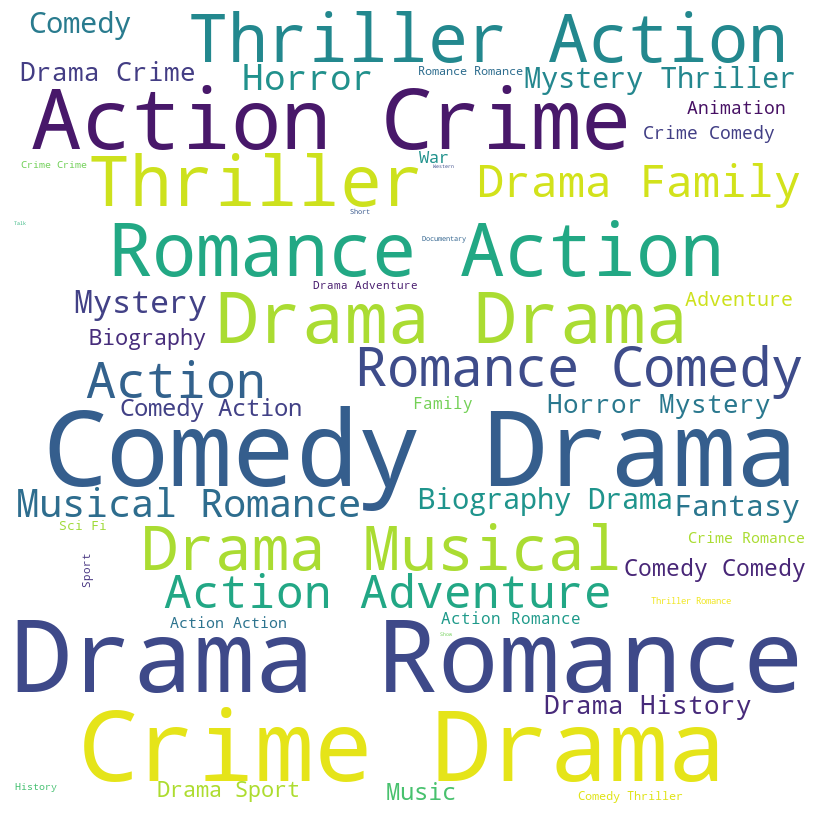

In [38]:
# create a word cloud from the list of genres
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=5).generate(my_string)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

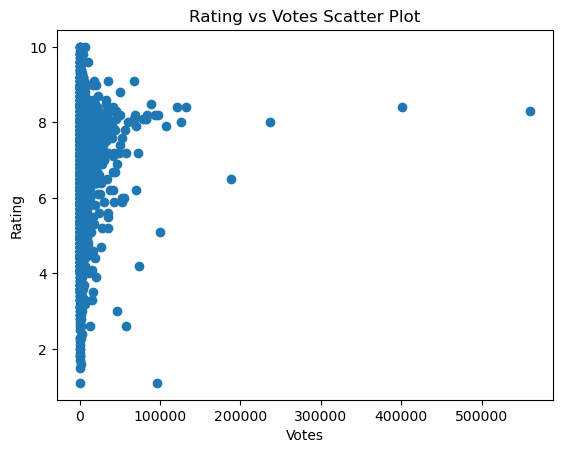

In [39]:
#compare if there is any relation between rating and votes of the movies
plt.scatter(final_merged['votes'], final_merged['rating'])
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Rating vs Votes Scatter Plot')
plt.show()
#many of the movies are having goof ratings with having votes from 0 to 10000
#but we can also notice that movies which have above 20000, are having rating above 6

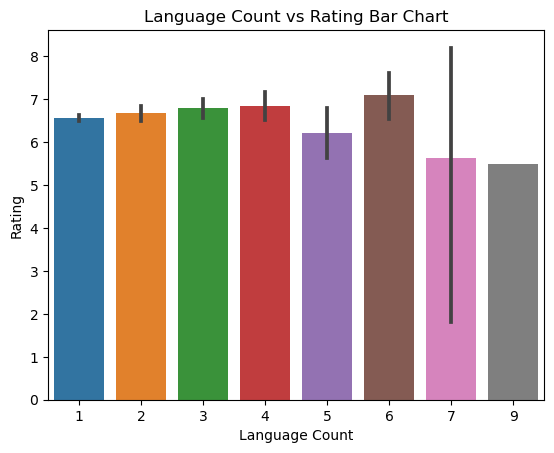

In [40]:
#language count and rating
# correlation between the number of languages a movie is available in and its rating.
sns.barplot(x=final_merged['language_count'], y=final_merged['rating'], data=final_merged)
plt.xlabel('Language Count')
plt.ylabel('Rating')
plt.title('Language Count vs Rating Bar Chart')
plt.show()

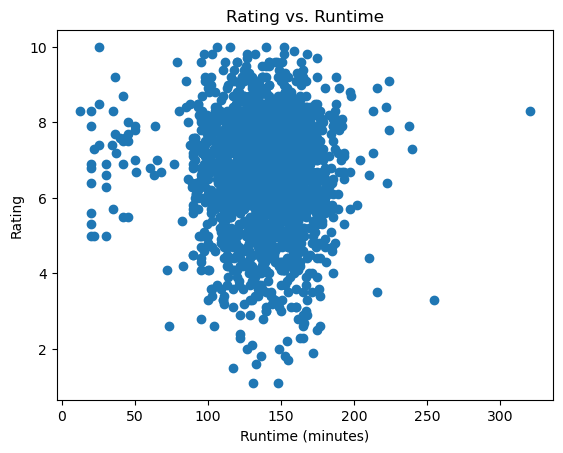

In [41]:
# create scatter plot
plt.scatter(final_merged['runtime'], final_merged['rating'])

# add labels and title
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.title('Rating vs. Runtime')

# display plot
plt.show()

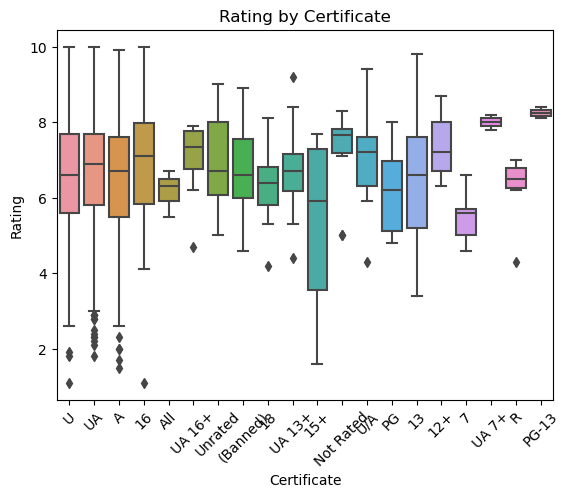

In [42]:
# create box plot
sns.boxplot(x=final_merged['certificate'], y=final_merged['rating'], data=final_merged)

# add labels and title
plt.xlabel('Certificate')
plt.ylabel('Rating')
plt.title('Rating by Certificate')
plt.xticks(rotation=45)

# display plot
plt.show()

In [43]:
#what are some good movies that are available to watch,
#good ==ratings>8 and language count above 3
good = (final_merged['rating'] > 8.0)  & (final_merged['language_count'] > 3)
#high_rated_movies = final_merged.loc[good, 'title':'language_count']
high_rated_movies = final_merged.loc[good, ['title', 'year', 'Language', 'genre', 'runtime', 'certificate', 'Actor 1', 'Actor 2', 'Actor 3']]

print(high_rated_movies)


                           title  year  \
25                   777 Charlie  2022   
52                         Aaina  1993   
112                       Adhurs  2010   
417                        Bobby  1973   
419                    Bodyguard  2011   
541                       Coolie  1983   
621                         Devi  1960   
688                          Don  2006   
699               Double Dhamaal  2011   
706               Dulha Mil Gaya  2010   
1101                     Jackpot  2019   
1132                       Jeeva  2014   
1155                      Johnny  2003   
1195            K.G.F: Chapter 2  2022   
1369                       Kurup  2021   
1447                  Love Story  1981   
1990  Rocketry: The Nambi Effect  2022   
2199                     Singham  2011   
2316                   Thank You  2011   
2406        Tumse Achha Kaun Hai  1969   

                                               Language  \
25                  [kannada, malayalam, tamil, telugu]   

In [44]:
final_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2550
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1967 non-null   object 
 1   year            1967 non-null   int32  
 2   Language        1967 non-null   object 
 3   votes           1967 non-null   int64  
 4   rating          1967 non-null   float64
 5   genre           1967 non-null   object 
 6   runtime         1967 non-null   int64  
 7   certificate     1967 non-null   object 
 8   ID              1967 non-null   object 
 9   Director        1967 non-null   object 
 10  Actor 1         1967 non-null   object 
 11  Actor 2         1967 non-null   object 
 12  Actor 3         1967 non-null   object 
 13  language_count  1967 non-null   int64  
dtypes: float64(1), int32(1), int64(3), object(9)
memory usage: 222.8+ KB
